# GPS Probe mapping for a single file input <gps_csv>
### For working with __many__ input file use gpsProbeMatching_4m_folder.ipynb

In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('py/') 

from functions import initialize, get_points_within_target_region, df2gdf, plot_map
from preprocess import preprocess_data
from map_matching import map_match_csv2gpx, map_match_csv2gpx_multithread
from generate_route_by_pyroutelib import generate_osm_routes_main
from config import max_threads


#### Initialize system:
- remove old data
- create necessary directories

In [2]:
initialize()

#### Remove input points outside of target boundary

- ananymize ap_id column
- clip points within boundary

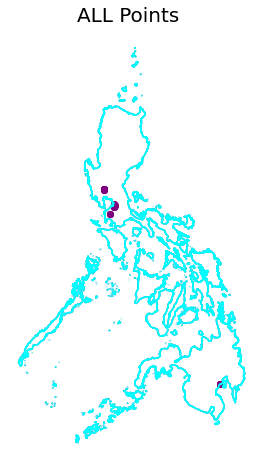

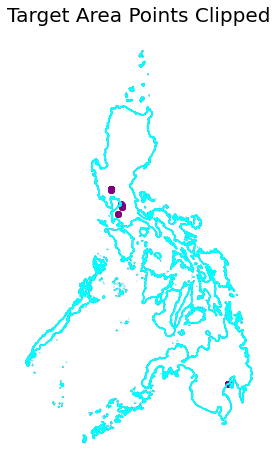

In [3]:
#gps_csv = 'raw_data/PHL_20000.csv'
#gps_csv = 'raw_data/PHL_10000.csv'
#gps_csv = 'raw_data/PHL_20190703_anonymized.csv'
gps_csv = '/mnt/lv/bidur/PHL_raw_data/small_20190209.csv'
gdf_probe_clipped, gdf_target = get_points_within_target_region (gps_csv, anonymize=False, display_plot = True)
#gdf_probe_clipped.head()

#### Preprocess input points

In [4]:
# 1. cleaning data & applying sampling
df_sample = preprocess_data()
df_sample.head(2)

,ap_id,timestamp,latitude,longitude
0,4165,2019-02-09 13:49:30,7.047925,125.56227
1,4165,2019-02-09 14:19:30,7.047925,125.56227


In [5]:
#df_sample.drop_duplicates(['ap_id'])

## apply thread

### map matching with osm roads using graphhopper

In [6]:
# map matching
#df_mapped_route = map_match_csv2gpx(df_sample)
df_mapped_route = None 
if max_threads > 1:
    df_mapped_route = map_match_csv2gpx_multithread(df_sample)
else:
    df_mapped_route = map_match_csv2gpx(df_sample)



completed:  java -jar matching-web/target/graphhopper-map-matching-web-1.0-SNAPSHOT.jar import map-data/philippines-latest.osm.pbf
<< multithreaded_process() -> START 2020-11-19 00:29:38.216162
Very Few Data (<5 points) in <<  12  csv file prepared and saved in  /mnt/lv/bidur/PHL_raw_data/map_match_gps_data/input/csv/0
  >> ap_ids
1  csv file prepared and saved in  /mnt/lv/bidur/PHL_raw_data/map_match_gps_data/input/csv/1
< apply_map_matching_multithread() >
Current Working Directory < apply_map_matching_multithread() > 
/mnt/lv/bidur/PHL_raw_data/map_match_gps_data/map-matching-master
GPX_DIR:  /mnt/lv/bidur/PHL_raw_data/map_match_gps_data/map-matching-master/matching-web/src/test/resources/target/1
Current Working Directory  /mnt/lv/bidur/PHL_raw_data/map_match_gps_data/map-matching-master
GPX_DIR:  /mnt/lv/bidur/PHL_raw_data/map_match_gps_data/map-matching-master/matching-web/src/test/resources/target/0

 Thread #0 completed:  java -jar matching-web/target/graphhopper-map-matching-

,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:03:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:03:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


pts3
MULTIPOINT (120.580735 15.166019, 120.580819 15.165482, 120.583056 15.166444, 120.583136 15.166462, 120.583141 15.165848, 120.584558 15.166707, 120.584619 15.166194, 120.5848 15.165247, 120.584891 15.164761, 120.585671 15.166977, 120.585791 15.166469, 120.585807 15.165433, 120.585847 15.165428, 120.585876 15.165406, 120.585957 15.164987, 120.586084 15.167109)
pt_ref
POINT (120.58615 15.167002)
id_done 0
POINT (120.586298 15.167008)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:03:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:03:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


pts3
MULTIPOINT (120.580735 15.166019, 120.580819 15.165482, 120.583056 15.166444, 120.583136 15.166462, 120.583141 15.165848, 120.584558 15.166707, 120.584619 15.166194, 120.5848 15.165247, 120.584891 15.164761, 120.585671 15.166977, 120.585791 15.166469, 120.585807 15.165433, 120.585847 15.165428, 120.585876 15.165406, 120.585957 15.164987, 120.586084 15.167109)
pt_ref
POINT (120.586298 15.167008)
id_done 0
POINT (120.581842 15.165508)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


pts3
MULTIPOINT (120.580735 15.166019, 120.580819 15.165482, 120.583056 15.166444, 120.583136 15.166462, 120.583141 15.165848, 120.584558 15.166707, 120.584619 15.166194, 120.5848 15.165247, 120.584891 15.164761, 120.585671 15.166977, 120.585791 15.166469, 120.585807 15.165433, 120.585847 15.165428, 120.585876 15.165406, 120.585957 15.164987, 120.586084 15.167109)
pt_ref
POINT (120.581842 15.165508)
id_done 5
POINT (120.585274 15.165247)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
5,5,3784,15.165482,120.580819,2019-02-09 02:26:30,POINT (120.58082 15.16548)
6,6,3784,15.165848,120.583141,,POINT (120.58314 15.16585)
7,7,3784,15.166444,120.583056,,POINT (120.58306 15.16644)
8,8,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
9,9,3784,15.166707,120.584558,,POINT (120.58456 15.16671)


pts3
MULTIPOINT (120.580682 15.162731, 120.580819 15.165482, 120.581018 15.162975, 120.581183 15.163069, 120.583056 15.166444, 120.583136 15.166462, 120.583141 15.165848, 120.584558 15.166707, 120.584619 15.166194, 120.5848 15.165247, 120.584891 15.164761, 120.585671 15.166977, 120.585791 15.166469, 120.585807 15.165433, 120.585847 15.165428, 120.585876 15.165406, 120.585957 15.164987)
pt_ref
POINT (120.585274 15.165247)
id_done 11
POINT (120.581824 15.165493)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
11,11,3784,15.165247,120.584800,2019-02-09 06:00:30,POINT (120.58480 15.16525)
12,12,3784,15.165433,120.585807,,POINT (120.58581 15.16543)
13,13,3784,15.165428,120.585847,,POINT (120.58585 15.16543)
14,14,3784,15.165406,120.585876,,POINT (120.58588 15.16541)
15,15,3784,15.164987,120.585957,,POINT (120.58596 15.16499)


pts3
MULTIPOINT (120.580317 15.162359, 120.580682 15.162731, 120.580736 15.16198, 120.580819 15.165482, 120.581018 15.162975, 120.581183 15.163069, 120.581695 15.161267, 120.582325 15.16059, 120.582735 15.160173, 120.583056 15.166444, 120.583141 15.165848, 120.584232 15.158745, 120.584558 15.166707, 120.584619 15.166194, 120.5848 15.165247, 120.584891 15.164761, 120.585671 15.166977, 120.585791 15.166469, 120.585807 15.165433, 120.585847 15.165428, 120.585876 15.165406, 120.585957 15.164987)
pt_ref
POINT (120.581824 15.165493)
id_done 23
POINT (120.585487 15.153133)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
23,23,3784,15.165482,120.580819,2019-02-09 12:59:30,POINT (120.58082 15.16548)
24,24,3784,15.163069,120.581183,,POINT (120.58118 15.16307)
25,25,3784,15.162975,120.581018,,POINT (120.58102 15.16297)
26,26,3784,15.162731,120.580682,,POINT (120.58068 15.16273)
27,27,3784,15.162359,120.580317,,POINT (120.58032 15.16236)


pts3
MULTIPOINT (120.580317 15.162359, 120.580682 15.162731, 120.580736 15.16198, 120.580819 15.165482, 120.581018 15.162975, 120.581183 15.163069, 120.581695 15.161267, 120.582325 15.16059, 120.582735 15.160173, 120.584232 15.158745, 120.584623 15.158444, 120.585232 15.153599, 120.585256 15.153445, 120.585934 15.157377, 120.585995 15.156451, 120.586066 15.156551, 120.586224 15.155695, 120.586295 15.157011, 120.586385 15.157041, 120.586429 15.156682, 120.586516 15.153754, 120.586927 15.153901)
pt_ref
POINT (120.585487 15.153133)
id_done 44
POINT (120.583805 15.166571)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
44,44,3784,15.153445,120.585256,2019-02-09 15:50:30,POINT (120.58526 15.15344)
45,45,3784,15.153401,120.585290,,POINT (120.58529 15.15340)
46,46,3784,15.153360,120.585347,,POINT (120.58535 15.15336)
47,47,3784,15.153211,120.585366,,POINT (120.58537 15.15321)
48,48,3784,15.153360,120.585347,,POINT (120.58535 15.15336)


pts3
MULTIPOINT (120.585232 15.153599, 120.585256 15.153445, 120.58529 15.153401, 120.585347 15.15336, 120.585366 15.153211, 120.585995 15.156451, 120.586066 15.156551, 120.586224 15.155695, 120.586295 15.157011, 120.586385 15.157041, 120.586429 15.156682, 120.586516 15.153754, 120.586927 15.153901, 120.588651 15.155335, 120.588947 15.155527, 120.589685 15.156057, 120.590597 15.156645, 120.590819 15.156733, 120.591023 15.156751)
pt_ref
POINT (120.583805 15.166571)
id_done 59
POINT (120.585555 15.155594)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
59,59,3784,15.157041,120.586385,2019-02-09 16:22:30,POINT (120.58639 15.15704)
60,60,3784,15.155335,120.588651,,POINT (120.58865 15.15533)
61,61,3784,15.155527,120.588947,,POINT (120.58895 15.15553)
62,62,3784,15.156057,120.589685,,POINT (120.58969 15.15606)
63,63,3784,15.156645,120.590597,,POINT (120.59060 15.15664)


pts3
MULTIPOINT (120.586385 15.157041, 120.588651 15.155335, 120.588947 15.155527, 120.589685 15.156057, 120.590597 15.156645, 120.590819 15.156733, 120.591023 15.156751, 120.591751 15.156887, 120.592106 15.158824, 120.592121 15.155755, 120.592139 15.155658, 120.592162 15.155635, 120.592227 15.156936, 120.592284 15.155619, 120.592348 15.155685, 120.59236 15.15774, 120.592402 15.157106, 120.592423 15.156474, 120.592442 15.156579, 120.592507 15.156937, 120.592518 15.156752, 120.592524 15.156818)
pt_ref
POINT (120.585555 15.155594)
id_done 59
POINT (120.585605 15.15422)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
59,59,3784,15.157041,120.586385,2019-02-09 17:19:30,POINT (120.58639 15.15704)
60,60,3784,15.155335,120.588651,,POINT (120.58865 15.15533)
61,61,3784,15.155527,120.588947,,POINT (120.58895 15.15553)
62,62,3784,15.156057,120.589685,,POINT (120.58969 15.15606)
63,63,3784,15.156645,120.590597,,POINT (120.59060 15.15664)


pts3
MULTIPOINT (120.586385 15.157041, 120.588651 15.155335, 120.588947 15.155527, 120.589685 15.156057, 120.590597 15.156645, 120.590819 15.156733, 120.591023 15.156751, 120.591751 15.156887, 120.592106 15.158824, 120.592121 15.155755, 120.592139 15.155658, 120.592162 15.155635, 120.592227 15.156936, 120.592284 15.155619, 120.592348 15.155685, 120.59236 15.15774, 120.592402 15.157106, 120.592423 15.156474, 120.592442 15.156579, 120.592507 15.156937, 120.592518 15.156752, 120.592524 15.156818)
pt_ref
POINT (120.585605 15.15422)
id_done 59
POINT (120.58003 15.178149)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
59,59,3784,15.157041,120.586385,2019-02-09 17:20:30,POINT (120.58639 15.15704)
60,60,3784,15.155335,120.588651,,POINT (120.58865 15.15533)
61,61,3784,15.155527,120.588947,,POINT (120.58895 15.15553)
62,62,3784,15.156057,120.589685,,POINT (120.58969 15.15606)
63,63,3784,15.156645,120.590597,,POINT (120.59060 15.15664)


pts3
MULTIPOINT (120.586385 15.157041, 120.588651 15.155335, 120.588947 15.155527, 120.589685 15.156057, 120.590597 15.156645, 120.590819 15.156733, 120.591023 15.156751, 120.591751 15.156887, 120.592106 15.158824, 120.592121 15.155755, 120.592139 15.155658, 120.592162 15.155635, 120.592227 15.156936, 120.592284 15.155619, 120.592348 15.155685, 120.59236 15.15774, 120.592402 15.157106, 120.592423 15.156474, 120.592442 15.156579, 120.592507 15.156937, 120.592518 15.156752, 120.592524 15.156818)
pt_ref
POINT (120.58003 15.178149)
id_done 59
POINT (120.580098 15.178052)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
59,59,3784,15.157041,120.586385,2019-02-09 17:24:30,POINT (120.58639 15.15704)
60,60,3784,15.155335,120.588651,,POINT (120.58865 15.15533)
61,61,3784,15.155527,120.588947,,POINT (120.58895 15.15553)
62,62,3784,15.156057,120.589685,,POINT (120.58969 15.15606)
63,63,3784,15.156645,120.590597,,POINT (120.59060 15.15664)


pts3
MULTIPOINT (120.586385 15.157041, 120.588651 15.155335, 120.588947 15.155527, 120.589685 15.156057, 120.590597 15.156645, 120.590819 15.156733, 120.591023 15.156751, 120.591751 15.156887, 120.592106 15.158824, 120.592121 15.155755, 120.592139 15.155658, 120.592162 15.155635, 120.592227 15.156936, 120.592284 15.155619, 120.592348 15.155685, 120.59236 15.15774, 120.592402 15.157106, 120.592423 15.156474, 120.592442 15.156579, 120.592507 15.156937, 120.592518 15.156752, 120.592524 15.156818)
pt_ref
POINT (120.580098 15.178052)
id_done 59
POINT (120.580109 15.178035)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
59,59,3784,15.157041,120.586385,2019-02-09 17:29:30,POINT (120.58639 15.15704)
60,60,3784,15.155335,120.588651,,POINT (120.58865 15.15533)
61,61,3784,15.155527,120.588947,,POINT (120.58895 15.15553)
62,62,3784,15.156057,120.589685,,POINT (120.58969 15.15606)
63,63,3784,15.156645,120.590597,,POINT (120.59060 15.15664)


pts3
MULTIPOINT (120.586385 15.157041, 120.588651 15.155335, 120.588947 15.155527, 120.589685 15.156057, 120.590597 15.156645, 120.590819 15.156733, 120.591023 15.156751, 120.591751 15.156887, 120.592106 15.158824, 120.592121 15.155755, 120.592139 15.155658, 120.592162 15.155635, 120.592227 15.156936, 120.592284 15.155619, 120.592348 15.155685, 120.59236 15.15774, 120.592402 15.157106, 120.592423 15.156474, 120.592442 15.156579, 120.592507 15.156937, 120.592518 15.156752, 120.592524 15.156818)
pt_ref
POINT (120.580109 15.178035)
id_done 59
POINT (120.583222 15.165524)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
59,59,3784,15.157041,120.586385,2019-02-09 17:34:30,POINT (120.58639 15.15704)
60,60,3784,15.155335,120.588651,,POINT (120.58865 15.15533)
61,61,3784,15.155527,120.588947,,POINT (120.58895 15.15553)
62,62,3784,15.156057,120.589685,,POINT (120.58969 15.15606)
63,63,3784,15.156645,120.590597,,POINT (120.59060 15.15664)


pts3
MULTIPOINT (120.586385 15.157041, 120.588651 15.155335, 120.588947 15.155527, 120.589685 15.156057, 120.590597 15.156645, 120.590819 15.156733, 120.591023 15.156751, 120.591751 15.156887, 120.592106 15.158824, 120.592121 15.155755, 120.592139 15.155658, 120.592162 15.155635, 120.592227 15.156936, 120.592284 15.155619, 120.592348 15.155685, 120.59236 15.15774, 120.592402 15.157106, 120.592423 15.156474, 120.592442 15.156579, 120.592507 15.156937, 120.592518 15.156752, 120.592524 15.156818)
pt_ref
POINT (120.583222 15.165524)
id_done 59
POINT (120.587497333333 15.1672666666667)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
59,59,3784,15.157041,120.586385,2019-02-09 17:45:30,POINT (120.58639 15.15704)
60,60,3784,15.155335,120.588651,,POINT (120.58865 15.15533)
61,61,3784,15.155527,120.588947,,POINT (120.58895 15.15553)
62,62,3784,15.156057,120.589685,,POINT (120.58969 15.15606)
63,63,3784,15.156645,120.590597,,POINT (120.59060 15.15664)


pts3
MULTIPOINT (120.586385 15.157041, 120.588651 15.155335, 120.588947 15.155527, 120.589685 15.156057, 120.590597 15.156645, 120.590819 15.156733, 120.591023 15.156751, 120.591751 15.156887, 120.592106 15.158824, 120.592121 15.155755, 120.592139 15.155658, 120.592162 15.155635, 120.592227 15.156936, 120.592284 15.155619, 120.592348 15.155685, 120.59236 15.15774, 120.592402 15.157106, 120.592423 15.156474, 120.592442 15.156579, 120.592507 15.156937, 120.592518 15.156752, 120.592524 15.156818)
pt_ref
POINT (120.587497333333 15.1672666666667)
id_done 80
POINT (120.586482 15.165501)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,3784,15.167109,120.586084,2019-02-09 02:06:30,POINT (120.58608 15.16711)
1,1,3784,15.166977,120.585671,,POINT (120.58567 15.16698)
2,2,3784,15.166707,120.584558,,POINT (120.58456 15.16671)
3,3,3784,15.166462,120.583136,,POINT (120.58314 15.16646)
4,4,3784,15.166019,120.580735,,POINT (120.58074 15.16602)


,id,ap_id,latitude,longitude,timestamp,geometry
80,80,3784,15.158824,120.592106,2019-02-09 21:22:30,POINT (120.59211 15.15882)
81,81,3784,15.159729,120.591884,,POINT (120.59188 15.15973)
82,82,3784,15.162722,120.591107,,POINT (120.59111 15.16272)
83,83,3784,15.162558,120.589877,,POINT (120.58988 15.16256)
84,84,3784,15.162520,120.589310,,POINT (120.58931 15.16252)


pts3
MULTIPOINT (120.583136 15.166462, 120.584558 15.166707, 120.585671 15.166977, 120.586084 15.167109, 120.586242 15.167181, 120.58716 15.167281, 120.587253 15.166902, 120.587797 15.164637, 120.587877 15.164159, 120.588178 15.162835, 120.588694 15.162944, 120.589027 15.162936, 120.589047 15.162923, 120.589101 15.162648, 120.589131 15.162584, 120.589173 15.162547, 120.589228 15.162525, 120.58931 15.16252, 120.589877 15.162558, 120.591107 15.162722, 120.591884 15.159729, 120.592106 15.158824)
pt_ref
POINT (120.586482 15.165501)
id_done 0
POINT (125.56227 7.047925)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 13:49:30,POINT (125.56246 7.04788)
1,1,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
2,2,4165,7.047052,125.563744,,POINT (125.56374 7.04705)
3,3,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
4,4,4165,10.915235,122.737616,,POINT (122.73762 10.91523)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 13:49:30,POINT (125.56246 7.04788)


pts3
POINT (125.562456 7.047881)
pt_ref
POINT (125.56227 7.047925)
id_done 0
POINT (125.56227 7.047925)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 13:49:30,POINT (125.56246 7.04788)
1,1,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
2,2,4165,7.047052,125.563744,,POINT (125.56374 7.04705)
3,3,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
4,4,4165,10.915235,122.737616,,POINT (122.73762 10.91523)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 13:49:30,POINT (125.56246 7.04788)


pts3
POINT (125.562456 7.047881)
pt_ref
POINT (125.56227 7.047925)
id_done 0
POINT (125.56227 7.047925)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 14:19:30,POINT (125.56246 7.04788)
1,1,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
2,2,4165,7.047052,125.563744,,POINT (125.56374 7.04705)
3,3,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
4,4,4165,10.915235,122.737616,,POINT (122.73762 10.91523)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 14:19:30,POINT (125.56246 7.04788)


pts3
POINT (125.562456 7.047881)
pt_ref
POINT (125.56227 7.047925)
id_done 0
POINT (125.56227 7.047925)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 14:49:30,POINT (125.56246 7.04788)
1,1,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
2,2,4165,7.047052,125.563744,,POINT (125.56374 7.04705)
3,3,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
4,4,4165,10.915235,122.737616,,POINT (122.73762 10.91523)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 14:49:30,POINT (125.56246 7.04788)


pts3
POINT (125.562456 7.047881)
pt_ref
POINT (125.56227 7.047925)
id_done 0
POINT (125.56227 7.047925)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 15:13:30,POINT (125.56246 7.04788)
1,1,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
2,2,4165,7.047052,125.563744,,POINT (125.56374 7.04705)
3,3,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
4,4,4165,10.915235,122.737616,,POINT (122.73762 10.91523)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 15:13:30,POINT (125.56246 7.04788)


pts3
POINT (125.562456 7.047881)
pt_ref
POINT (125.56227 7.047925)
id_done 0
POINT (125.56227 7.047925)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 15:46:30,POINT (125.56246 7.04788)
1,1,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
2,2,4165,7.047052,125.563744,,POINT (125.56374 7.04705)
3,3,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
4,4,4165,10.915235,122.737616,,POINT (122.73762 10.91523)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 15:46:30,POINT (125.56246 7.04788)


pts3
POINT (125.562456 7.047881)
pt_ref
POINT (125.56227 7.047925)
id_done 0
POINT (125.563905 7.046902)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 16:49:30,POINT (125.56246 7.04788)
1,1,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
2,2,4165,7.047052,125.563744,,POINT (125.56374 7.04705)
3,3,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
4,4,4165,10.915235,122.737616,,POINT (122.73762 10.91523)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 16:49:30,POINT (125.56246 7.04788)


pts3
POINT (125.562456 7.047881)
pt_ref
POINT (125.563905 7.046902)
id_done 0
POINT (125.56227 7.047925)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 17:47:30,POINT (125.56246 7.04788)
1,1,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
2,2,4165,7.047052,125.563744,,POINT (125.56374 7.04705)
3,3,4165,7.047385,125.562337,,POINT (125.56234 7.04739)
4,4,4165,10.915235,122.737616,,POINT (122.73762 10.91523)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,4165,7.047881,125.562456,2019-02-09 17:47:30,POINT (125.56246 7.04788)


pts3
POINT (125.562456 7.047881)
pt_ref
POINT (125.56227 7.047925)

 Thread #1 completed:  java -jar matching-web/target/graphhopper-map-matching-web-1.0-SNAPSHOT.jar match /mnt/lv/bidur/PHL_raw_data/map_match_gps_data/map-matching-master/matching-web/src/test/resources/target/1/*.gpx

convert_resgpx2csv -> /mnt/lv/bidur/PHL_raw_data/map_match_gps_data/output/res_csv/1
Matched gpx -> /mnt/lv/bidur/PHL_raw_data/map_match_gps_data/map-matching-master/matching-web/src/test/resources/target/1/*.res.gpx
id_done 0
POINT (120.995049 14.562536)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,1374,14.562716,120.995364,2019-02-09 03:59:30,POINT (120.99536 14.56272)
1,1,1374,14.562902,120.995809,,POINT (120.99581 14.56290)
2,2,1374,14.563131,120.996294,,POINT (120.99629 14.56313)
3,3,1374,14.563693,120.997569,,POINT (120.99757 14.56369)
4,4,1374,14.564052,120.998239,,POINT (120.99824 14.56405)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,1374,14.562716,120.995364,2019-02-09 03:59:30,POINT (120.99536 14.56272)
1,1,1374,14.562902,120.995809,,POINT (120.99581 14.56290)
2,2,1374,14.563131,120.996294,,POINT (120.99629 14.56313)
3,3,1374,14.563693,120.997569,,POINT (120.99757 14.56369)
4,4,1374,14.564052,120.998239,,POINT (120.99824 14.56405)


pts3
MULTIPOINT (120.995364 14.562716, 120.995809 14.562902, 120.996294 14.563131, 120.997569 14.563693, 120.998239 14.564052, 120.998493 14.563186, 120.998626 14.562799, 120.998786 14.562399, 120.998939 14.562075, 120.998986 14.562015, 120.99947 14.561559, 120.999621 14.561441, 120.999803 14.56133, 121.000084 14.561213, 121.00047 14.561122, 121.000901 14.56107, 121.001772 14.561039)
pt_ref
POINT (120.995049 14.562536)
id_done 0
POINT (121.007035333333 14.5582526666667)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,1374,14.562716,120.995364,2019-02-09 03:59:30,POINT (120.99536 14.56272)
1,1,1374,14.562902,120.995809,,POINT (120.99581 14.56290)
2,2,1374,14.563131,120.996294,,POINT (120.99629 14.56313)
3,3,1374,14.563693,120.997569,,POINT (120.99757 14.56369)
4,4,1374,14.564052,120.998239,,POINT (120.99824 14.56405)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,1374,14.562716,120.995364,2019-02-09 03:59:30,POINT (120.99536 14.56272)
1,1,1374,14.562902,120.995809,,POINT (120.99581 14.56290)
2,2,1374,14.563131,120.996294,,POINT (120.99629 14.56313)
3,3,1374,14.563693,120.997569,,POINT (120.99757 14.56369)
4,4,1374,14.564052,120.998239,,POINT (120.99824 14.56405)


pts3
MULTIPOINT (120.995364 14.562716, 120.995809 14.562902, 120.996294 14.563131, 120.997569 14.563693, 120.998239 14.564052, 120.998493 14.563186, 120.998626 14.562799, 120.998786 14.562399, 120.998939 14.562075, 120.998986 14.562015, 120.99947 14.561559, 120.999621 14.561441, 120.999803 14.56133, 121.000084 14.561213, 121.00047 14.561122, 121.000901 14.56107, 121.001772 14.561039)
pt_ref
POINT (121.007035333333 14.5582526666667)
id_done 16
POINT (121.035284666667 14.5064896666667)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,1374,14.562716,120.995364,2019-02-09 03:59:30,POINT (120.99536 14.56272)
1,1,1374,14.562902,120.995809,,POINT (120.99581 14.56290)
2,2,1374,14.563131,120.996294,,POINT (120.99629 14.56313)
3,3,1374,14.563693,120.997569,,POINT (120.99757 14.56369)
4,4,1374,14.564052,120.998239,,POINT (120.99824 14.56405)


,id,ap_id,latitude,longitude,timestamp,geometry
16,16,1374,14.561039,121.001772,2019-02-09 04:04:30,POINT (121.00177 14.56104)
17,17,1374,14.561057,121.002387,,POINT (121.00239 14.56106)
18,18,1374,14.561169,121.003186,,POINT (121.00319 14.56117)
19,19,1374,14.561260,121.003629,,POINT (121.00363 14.56126)
20,20,1374,14.561379,121.004058,,POINT (121.00406 14.56138)


pts3
MULTIPOINT (121.001772 14.561039, 121.002387 14.561057, 121.003186 14.561169, 121.003629 14.56126, 121.004058 14.561379, 121.004495 14.561523, 121.005203 14.561809, 121.006088 14.560129, 121.006304 14.559792, 121.008709 14.555315, 121.010055 14.552786, 121.013027 14.547348, 121.014416 14.544768, 121.015286 14.543109, 121.015824 14.542129, 121.01603 14.541679, 121.016208 14.541031)
pt_ref
POINT (121.035284666667 14.5064896666667)
id_done 32
POINT (121.044152666667 14.4549203333333)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,1374,14.562716,120.995364,2019-02-09 03:59:30,POINT (120.99536 14.56272)
1,1,1374,14.562902,120.995809,,POINT (120.99581 14.56290)
2,2,1374,14.563131,120.996294,,POINT (120.99629 14.56313)
3,3,1374,14.563693,120.997569,,POINT (120.99757 14.56369)
4,4,1374,14.564052,120.998239,,POINT (120.99824 14.56405)


,id,ap_id,latitude,longitude,timestamp,geometry
32,32,1374,14.541031,121.016208,2019-02-09 04:09:30,POINT (121.01621 14.54103)
33,33,1374,14.540662,121.016347,,POINT (121.01635 14.54066)
34,34,1374,14.540018,121.016684,,POINT (121.01668 14.54002)
35,35,1374,14.538898,121.017525,,POINT (121.01753 14.53890)
36,36,1374,14.531179,121.021705,,POINT (121.02170 14.53118)


pts3
MULTIPOINT (121.016208 14.541031, 121.016347 14.540662, 121.016684 14.540018, 121.017525 14.538898, 121.021705 14.531179, 121.022106 14.530461, 121.022209 14.53015, 121.022791 14.529011, 121.023703 14.527366, 121.024025 14.526874, 121.024318 14.526484, 121.024653 14.526144, 121.025447 14.525159, 121.02614 14.524117, 121.026498 14.52353, 121.027225 14.522117, 121.028511 14.519709)
pt_ref
POINT (121.044152666667 14.4549203333333)
id_done 48
POINT (121.029546 14.448662)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,1374,14.562716,120.995364,2019-02-09 03:59:30,POINT (120.99536 14.56272)
1,1,1374,14.562902,120.995809,,POINT (120.99581 14.56290)
2,2,1374,14.563131,120.996294,,POINT (120.99629 14.56313)
3,3,1374,14.563693,120.997569,,POINT (120.99757 14.56369)
4,4,1374,14.564052,120.998239,,POINT (120.99824 14.56405)


,id,ap_id,latitude,longitude,timestamp,geometry
48,48,1374,14.519709,121.028511,2019-02-09 04:14:30,POINT (121.02851 14.51971)
49,49,1374,14.518150,121.029381,,POINT (121.02938 14.51815)
50,50,1374,14.515584,121.030745,,POINT (121.03074 14.51558)
51,51,1374,14.514307,121.031442,,POINT (121.03144 14.51431)
52,52,1374,14.513703,121.031794,,POINT (121.03179 14.51370)


pts3
MULTIPOINT (121.028511 14.519709, 121.029381 14.51815, 121.030745 14.515584, 121.031442 14.514307, 121.031794 14.513703, 121.032378 14.512795, 121.033118 14.51149, 121.033775 14.510285, 121.03425 14.50933, 121.034553 14.508581, 121.034713 14.508097, 121.035028 14.507049, 121.035238 14.506463, 121.035452 14.505926, 121.035863 14.505049, 121.037061 14.50287, 121.037679 14.501679)
pt_ref
POINT (121.029546 14.448662)
id_done 64
POINT (121.025268666667 14.444934)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,1374,14.562716,120.995364,2019-02-09 03:59:30,POINT (120.99536 14.56272)
1,1,1374,14.562902,120.995809,,POINT (120.99581 14.56290)
2,2,1374,14.563131,120.996294,,POINT (120.99629 14.56313)
3,3,1374,14.563693,120.997569,,POINT (120.99757 14.56369)
4,4,1374,14.564052,120.998239,,POINT (120.99824 14.56405)


,id,ap_id,latitude,longitude,timestamp,geometry
64,64,1374,14.501679,121.037679,2019-02-09 04:19:30,POINT (121.03768 14.50168)
65,65,1374,14.498032,121.039641,,POINT (121.03964 14.49803)
66,66,1374,14.493197,121.042284,,POINT (121.04228 14.49320)
67,67,1374,14.491836,121.042996,,POINT (121.04300 14.49184)
68,68,1374,14.490253,121.043872,,POINT (121.04387 14.49025)


pts3
MULTIPOINT (121.037679 14.501679, 121.039641 14.498032, 121.042284 14.493197, 121.042996 14.491836, 121.043872 14.490253, 121.044276 14.489332, 121.044393 14.488958, 121.044705 14.488093, 121.04491 14.487193, 121.04503 14.486468, 121.045114 14.485417, 121.045124 14.458012, 121.045134 14.484023, 121.045181 14.462922, 121.045185 14.470321, 121.045214 14.45914, 121.045215 14.460391)
pt_ref
POINT (121.025268666667 14.444934)
id_done 80
POINT (121.021269666667 14.4337046666667)


,id,ap_id,latitude,longitude,timestamp,geometry
0,0,1374,14.562716,120.995364,2019-02-09 03:59:30,POINT (120.99536 14.56272)
1,1,1374,14.562902,120.995809,,POINT (120.99581 14.56290)
2,2,1374,14.563131,120.996294,,POINT (120.99629 14.56313)
3,3,1374,14.563693,120.997569,,POINT (120.99757 14.56369)
4,4,1374,14.564052,120.998239,,POINT (120.99824 14.56405)


,id,ap_id,latitude,longitude,timestamp,geometry
80,80,1374,14.458012,121.045124,2019-02-09 04:24:30,POINT (121.04512 14.45801)
81,81,1374,14.456852,121.045071,,POINT (121.04507 14.45685)
82,82,1374,14.455606,121.045080,,POINT (121.04508 14.45561)
83,83,1374,14.455497,121.045068,,POINT (121.04507 14.45550)
84,84,1374,14.455405,121.045040,,POINT (121.04504 14.45541)


pts3
MULTIPOINT (121.041019 14.455116, 121.041321 14.455004, 121.042821 14.454578, 121.043062 14.454557, 121.043264 14.454592, 121.043585 14.454715, 121.043876 14.454879, 121.044106 14.454966, 121.044483 14.455054, 121.044779 14.455159, 121.044899 14.455222, 121.044969 14.455296, 121.04504 14.455405, 121.045068 14.455497, 121.045071 14.456852, 121.04508 14.455606, 121.045124 14.458012)
pt_ref
POINT (121.021269666667 14.4337046666667)
Thread operation  complete


 Map Matching and route generation completed
/mnt/lv/bidur/PHL_raw_data/map_match_gps_data/output/5_final_csv_4_mobmap.csv
<< multithreaded_process() -> END 2020-11-19 00:29:44.241291


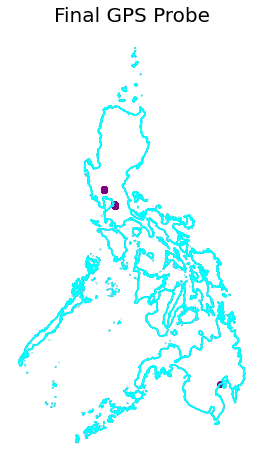

In [7]:
gdf_mapped = df2gdf(df_mapped_route)
plot_map(gdf_mapped, gdf_target, "Final GPS Probe") 

In [8]:
#generate_osm_routes_main( )